In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
### We have to find a better way to work with this.
import sys
#sys.path.append('/Volumes/MacBookHD/Projects/PyPharmer_devel/') #Path for Angel in ashrey
sys.path.append ('/home/angel/Documents/angel/projects/PyPharmer_devel/') #path for Angel in balmunt 
#sys.path.append('/home/diego/Trabajo/Proyectos/PyPharmer_devel/') # path for Diego
import matplotlib as mt
from matplotlib import pylab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import itertools as it
import networkx as nx
import numpy as np
import PyPharmer as phr
import simplejson as json
import os 
from pprint import pprint

In [3]:
json_file1='../Server_Files/ZINCpharmer.json'
json_file2='../Server_Files/pharmit.json'
json_file3='../Server_Files/gold_soln_l2199_3D_H_Ch_m1_4.json'
benchmark='../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_A_PRC.json'

opening multiple files form benchmark folder to analyze clique clustering

In [4]:
BCR_ABL_path= '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/'
ligands = []
for filename in os.listdir(BCR_ABL_path):
    if '.json' in filename:
        ligands.append(BCR_ABL_path+filename)
print (ligands)

['../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1opj_B_STI.json', '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_B_STI.json', '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_A_STI.json', '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_A_PRC.json', '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_B_PRC.json', '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1opj_A_STI.json']


<IPython.core.display.Javascript object>


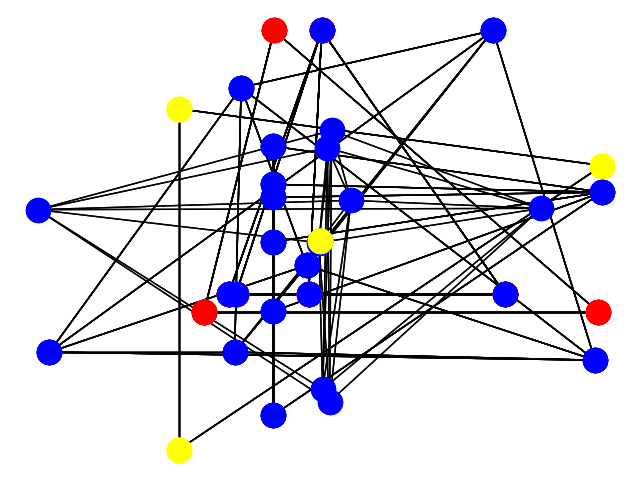

File: ../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1opj_B_STI.json   number or nodes: 7   Number of edges: 21
File: ../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_B_STI.json   number or nodes: 7   Number of edges: 21
File: ../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_A_STI.json   number or nodes: 7   Number of edges: 21
File: ../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_A_PRC.json   number or nodes: 8   Number of edges: 28
File: ../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_B_PRC.json   number or nodes: 8   Number of edges: 28
File: ../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1opj_A_STI.json   number or nodes: 7   Number of edges: 21


In [5]:
color_code={ 1.0:      'blue',\
             2.0:   'red',\
             3.0:      'yellow',\
             4.0:           'green',\
             5.0:        [1.00, 0.00, 0.00],\
             6.0:        [0.00, 0.00, 1.00],\
             7.0:    [0.00, 1.00, 1.00],\
             'Other':              [0.74, 0.74, 0.74],\
             'PhenylalanineAnalog':[1.0, 1.0, 0.0],\
             'LeuValAnalog':       [1.0, 1.0, 0.0] \
             }
for file in ligands:
    data=phr.Descriptors (input_file=file,select='enabled')
    G= nx.Graph (pharmacophore='descriptors')
    for element in data.points:
        node=(element[1],element[2],element[3],element[5],element[6],element[7])
        G.add_node (node_for_adding=node, name=element[0])
        color=color_code[G.nodes[node]['name']]
        #color=color_code[element[0]]
        for i in range (len(G.nodes)):
            for j in range (len(G.nodes)):
                if j>i:G.add_edge (list(G.nodes)[j],list(G.nodes)[i])
        nx.draw (G,pos=nx.spectral_layout(G),node_color=color)
    print ('File:',file,' ','number or nodes:',G.number_of_nodes(),' ','Number of edges:',G.number_of_edges ())